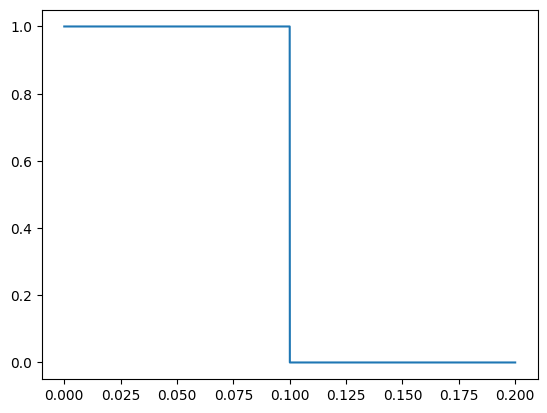

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def linear_to_db(x):
    return 20 * np.log10(np.abs(x) + 1e-8)

def db_to_linear(db):
    return 10**(db / 20)

sr = 44100

ATT_MS = 25.0  # Attack time in ms
REL_MS = 25.0 # Release time in ms

ATT_COEF = np.exp(-1. / (sr * ATT_MS * 1e-3)) # samples per millisecond
REL_COEF = np.exp(-1. / (sr * REL_MS * 1e-3))

# create a buffer of 0.2s that has a value of one for half of the time and 0 for the rest
buffer = np.zeros(int(sr * 0.2))
buffer[:len(buffer)//2] = 1

x = np.arange(len(buffer)) / sr

plt.plot(x, buffer)

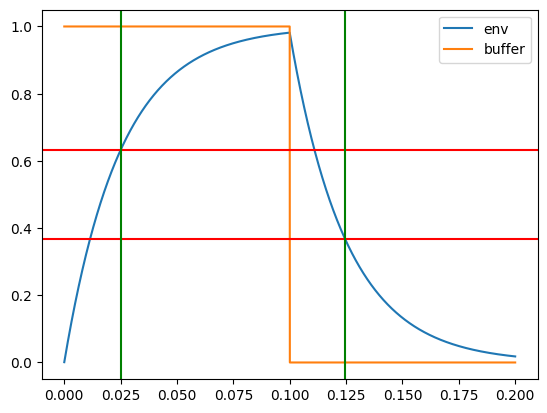

In [22]:
env = np.zeros(len(buffer))
last_env = 0.0
for i, xn in enumerate(buffer):
    cur_env = 0.0
    if xn > last_env:
        cur_env = ATT_COEF * (last_env - xn) + xn
    else:
        cur_env = REL_COEF * (last_env - xn) + xn
    last_env = cur_env
    env[i] = cur_env

# find first value above 0.632
idx_632 = np.argmax(env > 0.632)
# find first value below 0.368, but start searching from the middle
idx_368 = np.argmax(env[::-1] > 0.368) + 1

plt.plot(x, env, label = 'env')
plt.plot(x, buffer, label = 'buffer')
# mark y values of 0.632 and 0.368
plt.axhline(0.632, color='r')
plt.axhline(0.368, color='r')

plt.axvline(x[idx_632], color='g')
plt.axvline(x[-idx_368], color='g')

plt.legend()
plt.show()